## Transfer Learning VGG 16 and VGG 19 using Keras

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Please download the dataset from the below url

In [3]:
from tensorflow.compat.v1 import ConfigProto
from tensorflow.compat.v1 import InteractiveSession

config = ConfigProto()
config.gpu_options.per_process_gpu_memory_fraction = 0.5
config.gpu_options.allow_growth = True
session = InteractiveSession(config=config)

In [4]:
# import the libraries as shown below

from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
#from tensorflow.keras.applications.resnet50 import ResNet50
#from keras.applications.vgg16 import VGG16

from tensorflow.keras.applications.resnet_v2 import ResNet101V2
from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob
#import matplotlib.pyplot as plt

In [5]:
# re-size all the images to this
IMAGE_SIZE = [224, 224]

train_path = '/content/drive/MyDrive/newwwwwww/train'
valid_path = '/content/drive/MyDrive/newwwwwww/test'


In [6]:
# Import the Vgg 16 library as shown below and add preprocessing layer to the front of VGG
# Here we will be using imagenet weights

#resnet = ResNet50(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

resnet=ResNet101V2(input_shape=IMAGE_SIZE + [3],include_top=False, weights='imagenet')




171317808/171317808 [==============================] - 10s 0us/step


In [7]:
# don't train existing weights
for layer in resnet.layers:
    layer.trainable = False

In [8]:
  # useful for getting number of output classes
folders = glob('/content/drive/MyDrive/dataset/train/*')
folders

['/content/drive/MyDrive/dataset/train/roten apple (1)',
 '/content/drive/MyDrive/dataset/train/rotten bannana (1)',
 '/content/drive/MyDrive/dataset/train/roten orange (1)',
 '/content/drive/MyDrive/dataset/train/fresh applel (1)',
 '/content/drive/MyDrive/dataset/train/fresh orange (1)',
 '/content/drive/MyDrive/dataset/train/fresh banana (1)']

In [9]:
# our layers - you can add more if you want
x = Flatten()(resnet.output)

In [10]:
prediction = Dense(len(folders), activation='softmax')(x)

# create a model object
model = Model(inputs=resnet.input, outputs=prediction)

In [11]:

# view the structure of the model
xx=model.summary()
xx

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 230, 230, 3)  0           ['input_1[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 112, 112, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                                                                                              

In [12]:
# tell the model what cost and optimization method to use
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)


In [13]:
# Use the Image Data Generator to import the images from the dataset
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [14]:
# Make sure you provide the same target size as initialied for the image size
training_set = train_datagen.flow_from_directory('/content/drive/MyDrive/dataset/train',
                                                 target_size = (224, 224),
                                                 batch_size = 10,
                                                 class_mode = 'categorical')

Found 1200 images belonging to 6 classes.


In [15]:
test_set = test_datagen.flow_from_directory('/content/drive/MyDrive/dataset/test',
                                            target_size = (224, 224),
                                            batch_size = 10,
                                            class_mode = 'categorical')

Found 100 images belonging to 6 classes.


In [16]:
# fit the model
# Run the cell. It will take some time to execute
r = model.fit(
  training_set,
  validation_data=test_set,
  epochs=50,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

Epoch 1/50
120/120 [==============================] - 763s 6s/step - loss: 1.8341 - accuracy: 0.8833 - val_loss: 0.3864 - val_accuracy: 0.9700
Epoch 2/50
120/120 [==============================] - 25s 204ms/step - loss: 0.6967 - accuracy: 0.9642 - val_loss: 0.0590 - val_accuracy: 0.9900
Epoch 3/50
120/120 [==============================] - 24s 201ms/step - loss: 0.7896 - accuracy: 0.9617 - val_loss: 0.7740 - val_accuracy: 0.9800
Epoch 4/50
120/120 [==============================] - 23s 188ms/step - loss: 0.6612 - accuracy: 0.9717 - val_loss: 0.1762 - val_accuracy: 0.9900
Epoch 5/50
120/120 [==============================] - 24s 202ms/step - loss: 0.4085 - accuracy: 0.9817 - val_loss: 4.0177e-06 - val_accuracy: 1.0000
Epoch 6/50
120/120 [==============================] - 24s 195ms/step - loss: 0.3879 - accuracy: 0.9800 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 7/50
120/120 [==============================] - 23s 189ms/step - loss: 0.3196 - accuracy: 0.9800 - val_loss: 7.0333e-0

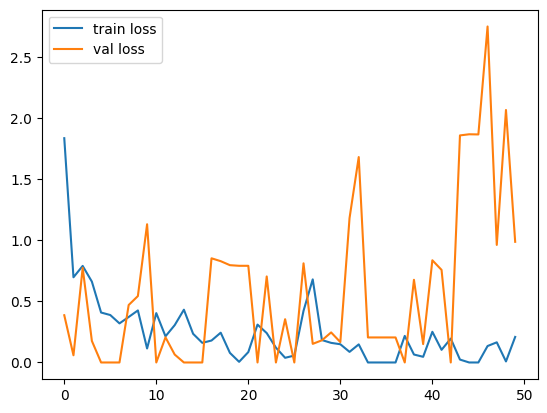

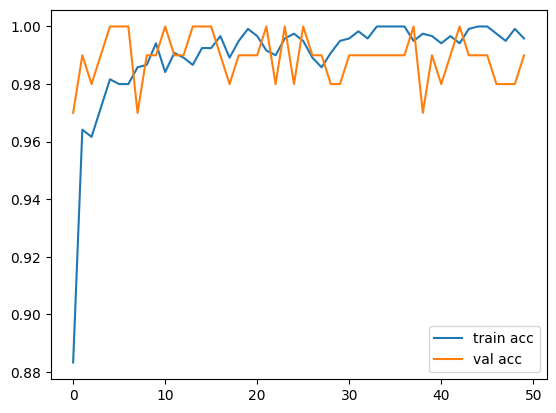

<Figure size 640x480 with 0 Axes>

In [28]:
# plot the loss

import matplotlib.pyplot as plt

plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [18]:
# save it as a h5 file


from tensorflow.keras.models import load_model

model.save('fruitresnet100.h5')

# New Section

In [46]:

y_pred = model.predict(test_set)


10/10 [==============================] - 1s 77ms/step


In [47]:
y_pred

array([[1.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00],
       [1.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00],
       [0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 1.0000000e+00],
       [0.0000000e+00, 1.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00],
       [0.0000000e+00, 0.0000000e+00, 1.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00],
       [0.0000000e+00, 1.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00],
       [0.0000000e+00, 1.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00],
       [0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 1.0000000e+00,
        0.0000000e+00, 0.0000000e+00],
       [0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 1.0000000e+00],
       [0.0000000e+00, 0.0000000e+00,

In [48]:
import numpy as np
y_pred = np.argmax(y_pred, axis=1)

In [49]:
y_true=test_set.classes

In [50]:
from sklearn.metrics import confusion_matrix

In [51]:
cm=confusion_matrix(y_true,y_pred)
cm

array([[2, 6, 4, 3, 1, 4],
       [3, 4, 3, 2, 2, 6],
       [3, 4, 3, 3, 3, 4],
       [3, 1, 2, 1, 1, 2],
       [4, 1, 2, 0, 1, 2],
       [5, 3, 6, 1, 2, 3]])

In [52]:
from sklearn.metrics import classification_report
cr=classification_report(y_true,y_pred)
print(cr)

              precision    recall  f1-score   support

           0       0.10      0.10      0.10        20
           1       0.21      0.20      0.21        20
           2       0.15      0.15      0.15        20
           3       0.10      0.10      0.10        10
           4       0.10      0.10      0.10        10
           5       0.14      0.15      0.15        20

    accuracy                           0.14       100
   macro avg       0.13      0.13      0.13       100
weighted avg       0.14      0.14      0.14       100



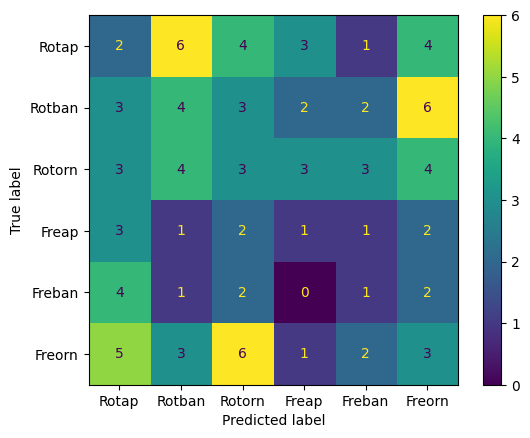

In [53]:

from sklearn import metrics
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = ['Rotap','Rotban','Rotorn','Freap','Freban','Freorn'])

import matplotlib.pyplot as plt
cm_display.plot()
plt.show()